# Assignment 2. Linear regression. Polynomial features. Regularization
## General Assignment

Before performing the practical work, you need download the dataset accordingly to the option on your machine (or cloud service)
1. Write a program that splits the original sample into a training set and a test set (training set, validation set, test set) with train_test_split method of Skikit Learn library
2. Using the scikit-learn library (http://scikit-learn.org/stable/), train the linear regression model for the training sample (example: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py)
3. Check the accuracy of the model from the test set with r2_score
4. Build a model using a polynomial function (example: http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py). Build plots with the dependence of the accuracy (r2_score) on the degree of the polynomial function for training set and test set (validation curve).
5. Build a model using regularization (example: http://scikit-learn.org/stable/modules/linear_model.html). select one from Lasso or Ridge. On the basis of experiments, select parameters for regularization. Build plots with the dependence of the error (r2_score) on the regularization coefficient for train dataset and test dataset (validation curve).


## Options
Data sets are taken from the [UCI Machine Learning Repository]
(https://archive.ics.uci.edu/ml/datasets.php)
The option is determined by the data set, which can be downloaded from the link above:
1. Condition Based Maintenance of Naval Propulsion Plants
2. UJIIndoorLoc
3. Insurance Company Benchmark (COIL 2000)
4. KDD Cup 1998 Data
5. Forest Fires
6. Concrete Compressive Strength
7. Concrete Slump Test
8. Communities and Crime
9. Parkinsons Telemonitoring
10. YearPredictionMSD
11. Relative location of CT slices on axial axis
12. Individual household electric power consumption
13. Energy efficiency
14. 3D Road Network (North Jutland, Denmark)
15. ISTANBUL STOCK EXCHANGE
16. Buzz in social media
17. [Physicochemical Properties of Protein Tertiary Structure](https://archive.ics.uci.edu/dataset/265/physicochemical+properties+of+protein+tertiary+structure)
18. Gas Sensor Array Drift Dataset at Different Concentrations
19. SkillCraft1 Master Table Dataset
20. SML2010
21. Bike Sharing Dataset
22. Combined Cycle Power Plant
23. BlogFeedback




## Вариант 17

Датасет: Physicochemical Properties of Protein Tertiary Structure

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

Считывание датасета:

In [3]:
df = pd.read_csv('CASP.csv')

Первым делом необходимо определить, какой параметр использовать в качестве результата предсказаний. Для этого построим корреляционную матрицу:

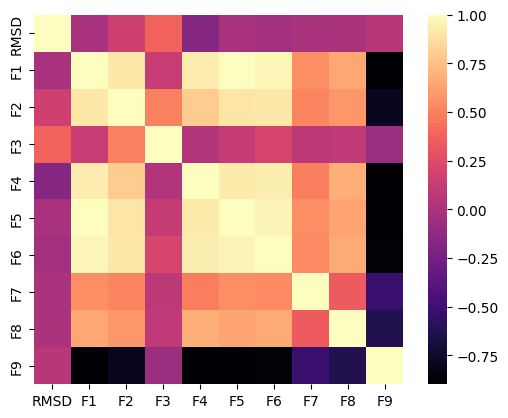

In [4]:
corrmat = df.corr() # Вычисление матрицы корреляции для всех признаков в DataFrame df
sns.heatmap(corrmat, cmap='magma', square=True) # Создание тепловой карты с использованием seaborn, передавая матрицу корреляции corrmat
plt.show()  # Отображение тепловой карты

Выберем переменную, которая имеет наибольшую линейную зависимость с большинством параметров:

In [5]:
column_to_predict = corrmat.columns[0]      # Выбор первой колонки в матрице корреляции в качестве колонки для предсказания
for column in corrmat.columns:              # Проход по всем колонкам в матрице корреляции
# Если сумма корреляций текущей колонки больше, чем сумма корреляций колонки, выбранной для предсказания
    if corrmat[column].sum() > corrmat[column_to_predict].abs().sum():  
# обновляем выбранную колонку для предсказания
        column_to_predict = column
print(f'Колонка, значения которой будут предсказываться: {column_to_predict}')

Колонка, значения которой будут предсказываться: F1


Теперь необходимо выбрать переменные, которые имеют наибольшую линейную зависимость с предсказываемым параметром:

In [6]:
min_correlation = 0.8       # Устанавливаем минимальное значение корреляции для учитываемых признаков
# Определяем условие для выбора признаков:
# признаки, у которых абсолютное значение корреляции с выбранной колонкой для предсказания
# больше или равно min_correlation и не совпадают с колонкой для предсказания
features_condition = (abs(corrmat[column_to_predict]) >= min_correlation) & (corrmat.columns != column_to_predict)
# Выбираем признаки, удовлетворяющие условию
features = corrmat.columns[features_condition]
# Создаем DataFrame
x_dataframe = df[features]
print(f'Колонки с лучшей линейной зависимостью: {features.values}')

Колонки с лучшей линейной зависимостью: ['F2' 'F4' 'F5' 'F6' 'F9']


1) Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, test set). Использовать стандартные функции (train_test_split и др. нельзя).

In [7]:
# Преобразуем данные признаков в массив numpy
x_data = np.array(x_dataframe)
# Преобразуем данные целевой переменной в массив numpy
y_data = np.array(df[column_to_predict])
# Задаем размер валидационного набора (в данном случае 20% от общего числа данных)
val_size = 0.2
# Разделяем данные на обучающий и валидационный наборы, используя функцию train_test_split из библиотеки sklearn.model_selection
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=val_size)

2. С использованием библиотеки scikit-learn обучить модель линейной регрессии по обучающей выборке.

In [8]:
# Создание объекта модели линейной регрессии
regr = linear_model.LinearRegression()
regr.fit(x_data, y_data)    # Обучение модели на обучающих данных

LinearRegression()

3. Проверьте точность модели из тестового набора с помощью r2_score.

In [9]:
# Использование обученной модели для предсказания целевой переменной на валидационном наборе данных
y_val_pred = regr.predict(x_val)
# Вычисление коэффициента детерминации для оценки качества прогноза
r2_val = r2_score(y_val, y_val_pred)
print(f'Коэффициент детерминации: {r2_val}')

Коэффициент детерминации: 0.9971791213997803


Для наглядности, отобразим предсказания на нулевую ось:

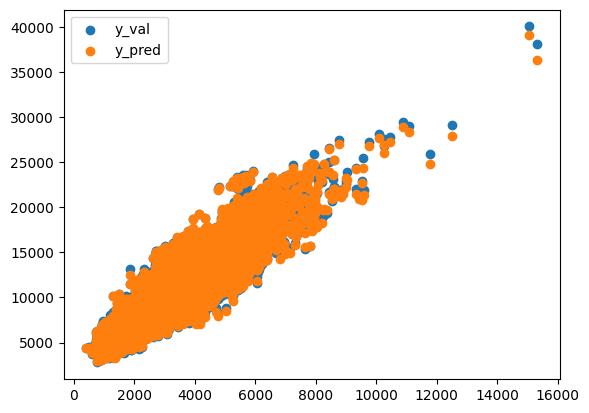

In [10]:
# Создание графика реальных значений (y_val) и предсказанных значений (y_val_pred) для первого признака (x_val.T[0])
plt.scatter(x_val.T[0], y_val, label="y_val")  # График для реальных значений
plt.scatter(x_val.T[0], y_val_pred, label="y_pred")  # График для предсказанных значений

# Добавление легенды на график
plt.legend()

4. Постройте модель, используя полиномиальную функцию. Постройте графики зависимости точности (r2_score) от степени полиномиальной функции для обучающего набора и тестового набора (кривая валидации).

Лучшее значение степени: 2. Лучшее значение R^2: 0.9974696814726446


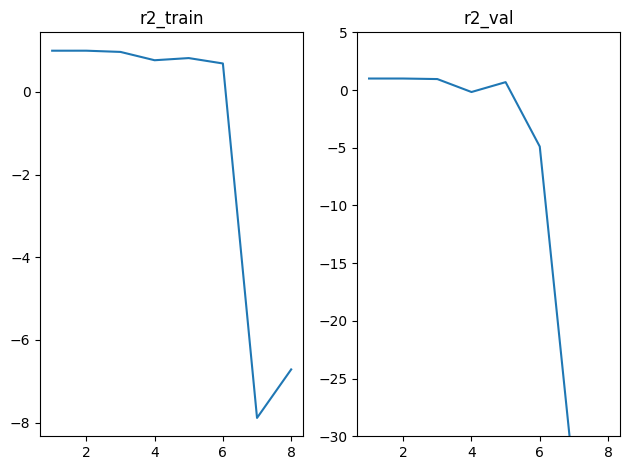

In [11]:
# Определение максимальной степени полинома
max_degree = 8

# Инициализация списков для хранения коэффициентов детерминации на обучающем и валидационном наборах данных для каждой степени полинома
r2_train = [0] * max_degree
r2_val = [0] * max_degree

# Создание фигуры и подграфиков
fig, axs = plt.subplots(1, 2)

# Переменные для хранения лучшей степени полинома и лучшего значения R^2
best_degree = 1
best_r2_score = -1e20

# Цикл для прохода по разным степеням полинома
for id, polynomial_degree in enumerate(range(1, max_degree + 1)):
    # Создание объекта PolynomialFeatures для создания полиномиальных признаков
    polynomial_features  = PolynomialFeatures(degree=polynomial_degree, include_bias=False)
    # Создание объекта LinearRegression для обучения модели линейной регрессии
    linear_regression = linear_model.LinearRegression()

    # Создание конвейера обработки данных и обучения модели
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),           # Добавление преобразования полиномиальных признаков в конвейер
            ("linear_regression", linear_regression),               # Добавление линейной регрессии в конвейер
        ]
    )

    # Обучение модели на обучающих данных
    pipeline.fit(x_train, y_train)

    # Предсказание значений на обучающем и валидационном наборах данных
    y_train_pred = pipeline.predict(x_train)
    y_val_pred = pipeline.predict(x_val)

    # Вычисление коэффициента детерминации на обучающем и валидационном наборах данных
    r2_train[id] = r2_score(y_train, y_train_pred)
    r2_val[id] = r2_score(y_val, y_val_pred)

    # Поиск лучшей степени полинома и лучшего значения R^2 на валидационном наборе данных
    if r2_val[id] >= best_r2_score:
        best_r2_score = r2_val[id]
        best_degree = polynomial_degree


print(f'Лучшее значение степени: {best_degree}. Лучшее значение R^2: {best_r2_score}')

# Построение графика R^2 на обучающем наборе данных
axs[0].plot(np.linspace(1, max_degree, max_degree), r2_train)
axs[0].set_title('r2_train')

# Построение графика R^2 на валидационном наборе данных
axs[1].plot(np.linspace(1, max_degree, max_degree), r2_val)
axs[1].set_title('r2_val')

# Установка пределов по вертикальной оси для лучшей визуализации
plt.ylim(-30, 5)

# Расположение графиков
fig.tight_layout()
plt.show()




5) Создайте модель, используя регуляризацию. Выберите один из «Lasso» или «Ridge». На основе экспериментов подберите параметры для регуляризации. Постройте графики с зависимостью ошибки (r2_score) от коэффициента регуляризации для обучающего набора данных и набора тестовых данных (кривая проверки).

Лучшее значение параметра alpha: 30.0. Лучшее значение R^2: -21.931409487349487


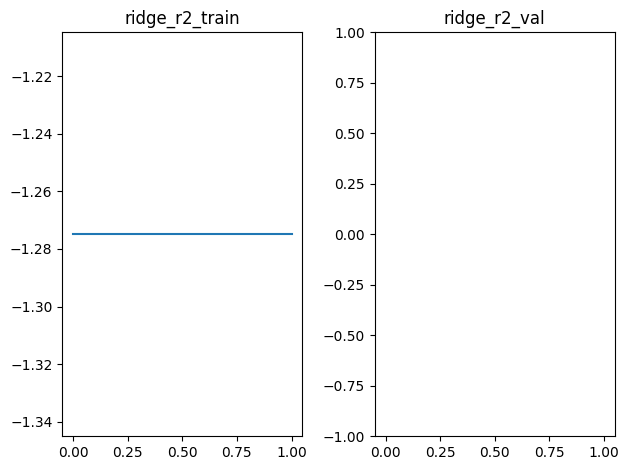

In [12]:
# Задаем степень полинома для полиномиальной регрессии методом Ridge
ridge_regression_degree = 8

# Задаем количество значений alpha, которые мы будем испытывать
count_alpha = 20

# Инициализация списков для хранения коэффициентов детерминации на обучающем и валидационном наборах данных для каждого значения alpha
ridge_r2_train = [0] * count_alpha
ridge_r2_val = [0] * count_alpha

# Создание фигуры и подграфиков
fig, axs = plt.subplots(1, 2)

# Переменные для хранения лучшего значения alpha и лучшего значения R^2
best_alpha = 0
best_r2_score = -1e20

# Цикл для прохода по различным значениям alpha
for id, alpha_factor in enumerate(np.linspace(0, 30, count_alpha)):
    # Создание объекта PolynomialFeatures для создания полиномиальных признаков
    polynomial_features  = PolynomialFeatures(degree=ridge_regression_degree, include_bias=False)
    # Создание объекта Ridge для обучения модели методом Ridge
    linear_regression = linear_model.Ridge(alpha=alpha_factor)

    # Создание конвейера обработки данных и обучения модели
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )

    # Обучение модели на обучающих данных
    pipeline.fit(x_train, y_train)

    # Предсказание значений на обучающем и валидационном наборах данных
    y_train_pred = pipeline.predict(x_train)
    y_val_pred = pipeline.predict(x_val)

    # Вычисление коэффициентов детерминации на обучающем и валидационном наборах данных
    ridge_r2_train[id] = r2_score(y_train, y_train_pred)
    ridge_r2_val[id] = r2_score(y_val, y_val_pred)

    # Поиск лучшего значения alpha и лучшего значения R^2 на валидационном наборе данных
    if ridge_r2_val[id] >= best_r2_score:
        best_r2_score = ridge_r2_val[id]
        best_alpha = alpha_factor


print(f'Лучшее значение параметра alpha: {best_alpha}. Лучшее значение R^2: {best_r2_score}')

# Построение графика R^2 на обучающем наборе данных
axs[0].plot(np.linspace(0, 1, count_alpha), ridge_r2_train)
axs[0].set_title('ridge_r2_train')

# Построение графика R^2 на валидационном наборе данных
axs[1].plot(np.linspace(0, 1, count_alpha), ridge_r2_val)
axs[1].set_title('ridge_r2_val')

# Установка пределов по вертикальной оси для лучшей визуализации
plt.ylim(-1, 1)

# Расположение графиков
fig.tight_layout()
# Отображение графиков
plt.show()


Регуляризация помогла справиться с переобучением - полиномная регрессия с степенью полинома 8 выдаёт близкое к 1 значение коэффициента детерминации.